In [1]:
import numpy as np
import control.matlab as mt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class SystemResponseSimulator:
    def __init__(self, sys_A, sys_B, sys_C, x0, ts, tf, dt):
        self.A = sys_A
        self.B = sys_B
        self.C = sys_C
    
        self.setInitialState(x0)
        self.setSimulationTime(ts, tf, dt)
            
    def setInitialState(self, x0):
        self.x0 = x0
        
    def setSimulationTime(self, ts, tf, dt):
        self.dt = dt
        self.t  = np.arange(ts, tf, dt)
    
    def calculateStateDot(self, sys_x, u):
        sys_Bu = np.dot(self.B, u)
        
        k1 = np.dot(self.A, sys_x) + sys_Bu
        k2 = np.dot(self.A, (sys_x + 0.5 * k1 * self.dt)) + sys_Bu
        k3 = np.dot(self.A, (sys_x + 0.5 * k2 * self.dt)) + sys_Bu
        k4 = np.dot(self.A, (sys_x + k3 * self.dt)) + sys_Bu

        return sys_x + (k1 + (2.0 * k2) + (2.0 * k3) + k4) * self.dt / 6.0
    
    def range(self):
        return range(self.t.size - 1)
    
    def freeResponse(self):
        x = self.x0
        x_out = x

        for t in range(self.t.size - 1):
            # Calculate input signal
            u = 0.0

            # Calculate derivative of state variable
            x_dot = self.calculateStateDot(x, u)

            # Update parameter
            x_out = np.hstack((x_out, x_dot))
            x = x_dot
        
        return x_out
    
    
    def stepResponse(self):
        x = self.x0
        x_out = x

        for t in range(self.t.size - 1):
            # Calculate input signal
            u = 1.0

            # Calculate derivative of state variable
            x_dot = self.calculateStateDot(x, u)

            # Update parameter
            x_out = np.hstack((x_out, x_dot))
            x = x_dot
        
        return x_out

In [5]:
# System parameter
A = np.array([
    [    0.,    0.,        1.,     0.],
    [    0.,    0.,        0.,     1.],
    [ 66.79,    0., -1.509e-3,  1.031],
    [-15.90,    0.,  3.593e-4, -126.8]
])

B = np.array([
    [0.],
    [0.],
    [-1.647],
    [202.5]
])

C = np.array([
    [1., 0., 0., 0.]
])

x0 = np.array([
    [10.],
    [0.],
    [0.],
    [0.]
])

# LQR gain
K = np.array([[1474, 0.2236, 180.6, 1.348]])

In [1]:
# Simulation parameter
dt = 0.001
ts = 0.00
tf = 20.0

# Simulator setting
simulator = SystemResponseSimulator(A, B, C, x0, ts, tf, dt)

NameError: name 'SystemResponseSimulator' is not defined

In [2]:
# Simulation
x = simulator.x0
x_out1 = x
u_out1 = np.array([[0]])

for t in simulator.range():
    # Calculate input signal
    u = np.dot(K, x)

    # Calculate derivative of state variable
    x_dot = simulator.calculateStateDot(x, u)

    # Update parameter
    x_out1 = np.hstack((x_out1, x_dot))
    u_out1 = np.hstack((u_out1, u))

    x = x_dot
    

NameError: name 'simulator' is not defined

In [26]:
x_out1 = simulator.freeResponse()

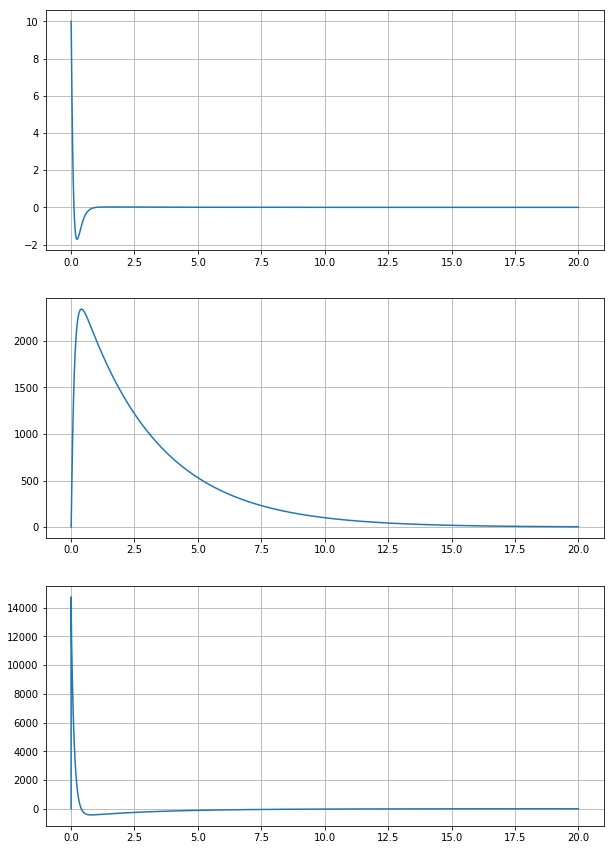

In [29]:
fig = plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.plot(simulator.t, x_out1[0, :], label="$x_1$")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(simulator.t, x_out1[1, :], label="$x_2$")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(simulator.t, u_out1[0], label="u")
plt.grid()